In [ ]:
# 얼굴인식(얼굴정보)     
# 가로(행) x 세로(열) x 3 numpy --→ 1 x 512 (embedding 데이터로 변환) --→ X, y를 머신러닝(SVM)

# 1. 데이터셋 다운로드 및 압축 해제
- 5celebrity 다운로드 경로: https://www.kaggle.com/datasets/dansbecker/5-celebrity-faces-dataset?resource=download

In [2]:
!unzip data/5celebrity.zip -d data/5celebrity

Archive:  data/5celebrity.zip
   creating: data/5celebrity/train/
   creating: data/5celebrity/train/ben_afflek/
  inflating: data/5celebrity/train/ben_afflek/httpcsvkmeuaeccjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg  


# 2. 얼굴 Detect
- MTCNN 라이브러리

In [3]:
# ! pip install mtcnn
# 아나콘다 프롬프트에서 실행

     ---------------------------------------- 1.9/1.9 MB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 99.8/99.8 kB 5.6 MB/s eta 0:00:00
     ------------------------------------- 301.8/301.8 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: lz4
    Found existing installation: lz4 3.1.3
    Uninstalling lz4-3.1.3:
      Successfully uninstalled lz4-3.1.3


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\4545\\anaconda3\\Lib\\site-packages\\~z4\\frame\\_frame.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
from mtcnn import MTCNN
import PIL
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 2.1 MTCNN을 이용해서 얼굴 형태 감지

In [2]:
detector = MTCNN()
image  = cv2.imread('data/5celebrity/train/elton_john/12.jpg', cv2.IMREAD_ANYCOLOR)
image  = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = detector.detect_faces(image)
result

# 'box': 얼굴을 감싸는 바운딩 박스(bounding box)의 좌표(좌상, 우하)
# 'confidence': 얼굴 검출의 신뢰도
# 'keypoints': 얼굴의 주요 특징 점들, 눈, 코, 입의 좌표

[{'box': [121, 69, 66, 83],
  'confidence': 0.9964280724525452,
  'keypoints': {'nose': [156, 121],
   'mouth_right': [170, 130],
   'right_eye': [169, 100],
   'left_eye': [139, 101],
   'mouth_left': [141, 131]}}]

## 2.2 탐지한 얼굴 그려보기

In [3]:
box = result[0]['box']       # 왼쪽 위 x, y, width, height
print(box)
x, y, w, h = box
keypoints = result[0]['keypoints'] # nose / mouth_right / right_eye / left_eye / mouth_left 좌표
cv2.rectangle(image, 
              (x,     y),          # 사각형 왼쪽 위 좌표
              (x + w, y + h), # 사각형 오른쪽 아래 좌표
              (0, 144, 255),                      # 사각형 색상
              2)
cv2.circle(image,
           keypoints['nose'], # 원의중심점
           2,                 # 반지름
           (255, 0, 0),       # 원 색상
           2,)
cv2.circle(image,
           keypoints['mouth_right'], # 원의중심점
           2,                        # 반지름
           (255, 0, 0),              # 원 색상
           2,)
cv2.circle(image,
           keypoints['right_eye'], # 원의중심점
           2,                      # 반지름
           (255, 0, 0),            # 원 색상
           2,)
cv2.circle(image,
           keypoints['left_eye'], # 원의중심점
           2,                     # 반지름
           (255, 0, 0),           # 원 색상
           2,)
cv2.circle(image,
           keypoints['mouth_left'], # 원의중심점
           2,                       # 반지름
           (255, 0, 0),             # 원 색상
           2,)
# 사각형과 점은 여전히 BGR 
cv2.imwrite('data/ben.jpg', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 얼굴 면적만 추출하여 저장
face = image[y:y + h, x:x + w]
cv2.imwrite('data/benface.jpg', cv2.cvtColor(face, cv2.COLOR_BGR2RGB))

[121, 69, 66, 83]


True

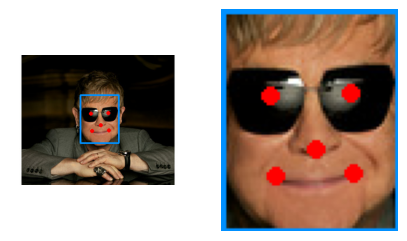

In [4]:
fig, axes = plt.subplots(1, 2, figsize = (5, 3))
axes[0].imshow(image)
axes[0].axis('off')
axes[1].imshow(face)
axes[1].axis('off')
plt.show()

## 2.3 입력형식에 맞게 차원 변환

In [5]:
face.shape
# sol 1
face_data = np.expand_dims(face, axis = 0)
# sol 2 # 비추
# face_data = face.reshape(-1, face.shape[0], face.shape[1], face.shape[2]) 
# sol 3
face_data = face[np.newaxis, :]
face_data.shape

(1, 83, 66, 3)

# 3. Facenet 활용하여 Embedding 데이터로 변환
```
- Embedding 처리란?
얼굴을 표현하는 고차원의 이미지 정보를 저차원으로 변환하면서 필요한 정보를 보존
숫자가 아닌 원 데이터를 Machine learning 모델이 이해하고 상관관계를 분석할 수 있는 연속 값으로 변환

- face_data     : 1 x 83 x 66 x 3
- Embedding Data: 1 x 512
```

In [ ]:
# ! pip install keras-facenet

In [7]:
from keras_facenet import FaceNet
model = FaceNet()

## 3.1 이미지 데이터를 FaceNet Embedding 데이터로 변환


In [8]:
# face_data 얼굴 이미지이거나 얼굴 특징 데이터가 있는 이미지의 유사성을 측정할 수 있는 1 x 512 배열
face_embedding = model.embeddings(face_data)
face_embedding.shape

1/1 [==============================] - 10s 10s/step


(1, 512)

In [9]:
face_embedding[0, :10]

array([-0.00516778,  0.03497617,  0.06088691,  0.11953422,  0.00298368,
        0.04815089, -0.07882894, -0.04683649, -0.05991695, -0.02180289],
      dtype=float32)

# 4. 분류모델을 만들기 위해서 데이터셋 생성
* n은 train 폴더 안의 사진 개수
* m은 test 폴더 안의 사진 개수

```
- X_train(n x 512), y_train(n)
- X_test(m x 512), y_test(m)
```

## 4.1 y_train(사람이름)과 X_train에 사용될 이미지 경로(x_train_path)
- y_test(사람이름)과 X_test에 사용될 이미지 경로(x_test_path)

In [8]:
import os
# 이미지 경로 생성
train_path = 'data/5celebrity/train'
test_path  = 'data/5celebrity/val'

In [9]:
# 하위 디렉토리명, 디렉토리 내 이미지 파일 이름들
list(os.walk(train_path))

[('data/5celebrity/train',
  ['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling'],
  []),
 ('data/5celebrity/train\\ben_afflek',
  [],
  ['httpcsvkmeuaeccjpg.jpg',
   'httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg',
   'httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg',
   'httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg',
   'httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg',
   'httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg',
   'httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg',
   'httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg',
   'httptrwebimgacstanetcxbdddmediasnmediajpg.jpg',
   'httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg',
   'httpwwwallposterscomimagesPostersPFjpg.jpg',
   'httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg',
   'httpwwwhillsindcomstorebenjpg.jpg',
   'httpwwwrumenewscomwpcontentup

In [10]:
def get_path(path):
    x_path = []
    y      = []
    for x in os.walk(path):
        if len(x[2]) == 0:
            # print(x, '에는 파일이 없네요')
            continue
        name = os.path.basename(x[0]) # basename: 경로의 마지막 이름 구성 요소를 반환
        print(name, '사진', len(x[2]), '장 parsing 중')
        print(x[2])
        for file_name in x[2]:
            # image_full_path = x[0].replace('\\', '/') + '/' + file_name
            image_full_path = path + '/' + name + '/' + file_name
            x_path.append(image_full_path)
            y.append(name)
    # print(len(y))
    # print(len(x_path))
    # for name, path in zip(y, x_path):
    #    print(name, path)
    
    return x_path, y

In [13]:
# get_path(train_path)
# list
x_train_path, y_train = get_path(train_path)
x_test_path, y_test   = get_path(test_path)

ben_afflek 사진 14 장 parsing 중
['httpcsvkmeuaeccjpg.jpg', 'httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg', 'httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg', 'httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg', 'httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg', 'httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg', 'httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg', 'httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg', 'httptrwebimgacstanetcxbdddmediasnmediajpg.jpg', 'httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg', 'httpwwwallposterscomimagesPostersPFjpg.jpg', 'httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg', 'httpwwwhillsindcomstorebenjpg.jpg', 'httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg']
elton_john 사진 16 장 parsing 중
['0.jpg', '1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '3.jpg', '4.jpg', '5.jpg'

In [14]:
len(x_train_path), len(y_train), len(x_test_path), len(y_test)

(92, 92, 25, 25)

In [16]:
for y, x in zip(y_train[::10], x_train_path[::10]):
    print(y, '-', x)

ben_afflek - data/5celebrity/train/ben_afflek/httpcsvkmeuaeccjpg.jpg
ben_afflek - data/5celebrity/train/ben_afflek/httpwwwallposterscomimagesPostersPFjpg.jpg
elton_john - data/5celebrity/train/elton_john/14.jpg
jerry_seinfeld - data/5celebrity/train/jerry_seinfeld/httpgraphicsnytimescomimagessectionmoviesfilmographyWireImagejpg.jpg
jerry_seinfeld - data/5celebrity/train/jerry_seinfeld/httpstatictherichestimagescomcdncwpcontentuploadsJerrySeinfeldjpg.jpg
jerry_seinfeld - data/5celebrity/train/jerry_seinfeld/httpwwwwatchidcomsitesdefaultfilesuploadsightingBreitlingwatchJerrySeinfeldjpg.jpg
madonna - data/5celebrity/train/madonna/httpssmediacacheakpinimgcomxffabffabbbcfbceaedjpg.jpg
mindy_kaling - data/5celebrity/train/mindy_kaling/httpgonetworthcomwpcontentuploadsthumbsjpg.jpg
mindy_kaling - data/5celebrity/train/mindy_kaling/httpssmediacacheakpinimgcomxbbfcbdedfbfdbjpg.jpg
mindy_kaling - data/5celebrity/train/mindy_kaling/httpwwwpictureszimbiocomfpMindyKalingfBgaONVFDFmjpg.jpg


In [17]:
for y, x in zip(y_test[::10], x_test_path[::10]):
    print(y, '-', x)

ben_afflek - data/5celebrity/val/ben_afflek/httpabsolumentgratuitfreefrimagesbenaffleckjpg.jpg
jerry_seinfeld - data/5celebrity/val/jerry_seinfeld/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIwNjANjMMDINzIxNjcjpg.jpg
mindy_kaling - data/5celebrity/val/mindy_kaling/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIOTcwODQNTUzNjQMzcjpg.jpg


## 4.2 Embedding Function을 통해 전체 학습 이미지를 Embedding 처리한 후 train_X에 저장

In [11]:
def make_embedding(path):
    'path의 이미지 읽기 → 얼굴정보만 추출 → facenet을 통해 Embedding Data로 전환'
    # print(path)
    image = cv2.imread(path, cv2.IMREAD_ANYCOLOR)  # BGR Format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # RGB Format, Numpy Array
    detector = MTCNN()
    result = detector.detect_faces(image)
    # result가 빈 리스트([])일 경우 = 얼굴인식 실패한 경우
    if not result: 
        print(path, '의 파일에서는 얼굴을 인지하지 못했습니다')
    # print(result)
    x, y, w, h = result[0]['box']
    # print(x, y, w, h)
    face = image[y : y + h,
                 x : x + w]
    # face 데이터 축 추가(축 추가 이유는 tensorflow v1의 placeholder 참고)
    input_data = np.expand_dims(face, axis = 0)
    # print(face.shape, input_data.shape)
    # Embedding Data로 전환
    model = FaceNet()
    face_embedding = model.embeddings(input_data) # 2차원
    return face_embedding

In [15]:
# Embedding 결과를 X_train_list에 append
X_train_list = []
for image_full_path in x_train_path:
    face_embedding = make_embedding(image_full_path)
    X_train_list.append(face_embedding[0])
    
len(X_train_list)

1/1 [==============================] - 0s 50ms/step


92

In [17]:
# Embedding 결과를 X_test_list에 append
X_test_list = []
for image_full_path in x_test_path:
    face_embedding = make_embedding(image_full_path)
    X_test_list.append(face_embedding[0])
    
len(X_test_list)

1/1 [==============================] - 0s 49ms/step


25

In [26]:
# y_train, y_test는 1차원, X_train_list, X_test_list는 2차원
len(X_train_list), len(y_train), len(X_test_list), len(y_test)

(92, 92, 25, 25)

In [23]:
X_train = np.array(X_train_list)
X_test = np.array(X_test_list)
X_train.shape, X_test.shape

((92, 512), (25, 512))

# 5. SVM(Support Vector Machine) 알고리즘을 이용하여 모델 생성

In [30]:
from sklearn import preprocessing, svm
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = svm.SVC(kernel = 'linear',  # 내부적으로 선형함수
                     probability = True) # 확률값 출력, softmax
classifier.fit(X_train, y_train)  

SVC(kernel='linear', probability=True)

In [31]:
# X_test의 예측값
y_hat = classifier.predict(X_test) 

accuracy = accuracy_score(y_test, # 실제값
                          y_hat)  # 예측값
print(accuracy*100, '%')

100.0 %


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat) # 혼돈행렬

array([[5, 0, 0, 0, 0],
       [0, 5, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 5, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

In [34]:
pd.crosstab(y_test, y_hat)

col_0,ben_afflek,elton_john,jerry_seinfeld,madonna,mindy_kaling
row_0,,,,,
ben_afflek,5,0,0,0,0
elton_john,0,5,0,0,0
jerry_seinfeld,0,0,5,0,0
madonna,0,0,0,5,0
mindy_kaling,0,0,0,0,5


# 6. 생성된 모델 사용(예측)

In [40]:
image_path = 'data/test_eltonjohn2.png'
face_embedding = make_embedding(image_path)
classifier.predict(face_embedding)

1/1 [==============================] - 0s 47ms/step


array(['elton_john'], dtype='<U14')

In [41]:
image_path = 'data/test_madonna.jpg'
face_embedding = make_embedding(image_path)
classifier.predict(face_embedding)

1/1 [==============================] - 0s 33ms/step


array(['madonna'], dtype='<U14')

In [42]:
classifier.predict_proba(face_embedding) # 확률

array([[0.05491404, 0.04485346, 0.0449404 , 0.71772016, 0.13757194]])

# 7. 모델 저장

In [45]:
# SVC 모델은 h5파일로 저장 불가
import joblib
joblib.dump(classifier, 'model/face_svc.pkl')

['model/face_svc.pkl']

# 8. 모델 불러오기

In [46]:
loaded_model = joblib.load('model/face_svc.pkl')

1/1 [==============================] - 0s 45ms/step
['madonna']
[[0.05491404 0.04485346 0.0449404  0.71772016 0.13757194]]


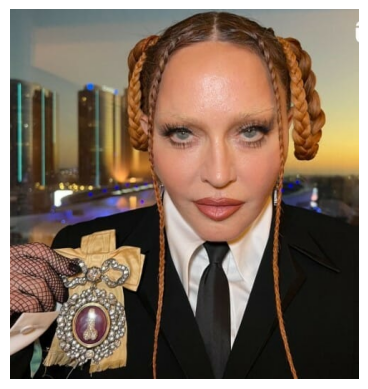

In [49]:
# 바로 predict 가능
# 내 pc내에 있는 경로만 image path 가능
image_path = 'data/test_madonna.jpg'
face_embedding = make_embedding(image_path)
print(loaded_model.predict(face_embedding))
print(loaded_model.predict_proba(face_embedding))
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

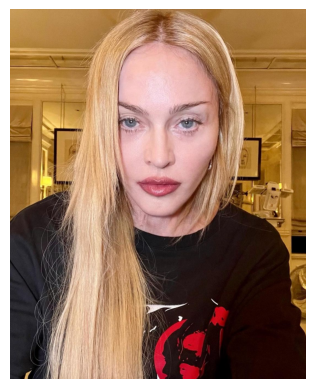

1/1 [==============================] - 0s 33ms/step
[[0.02901511 0.04707906 0.03098312 0.86424964 0.02867308]]
madonna


In [57]:
# 웹에서 복사한 이미지 주소를 path로 사용할 경우
import requests
image_path = 'https://img.vogue.co.kr/vogue/2023/07/style_64accdeee21cd.jpeg'
response = requests.get(image_path)
save_path = 'data/test.jpg'
with open(save_path, 'wb') as imageFile:
    imageFile.write(response.content)
image = cv2.imread(save_path, cv2.IMREAD_ANYCOLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

face_embedding = make_embedding(save_path)
result = loaded_model.predict_proba(face_embedding)
print(result)
names = ['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling']				
print(names[result.argmax(axis = 1)[0]])